In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from time import time
from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/DATA SETS/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Let's visulise the correlation between each of the feature of the dataset



<function matplotlib.pyplot.show(*args, **kw)>

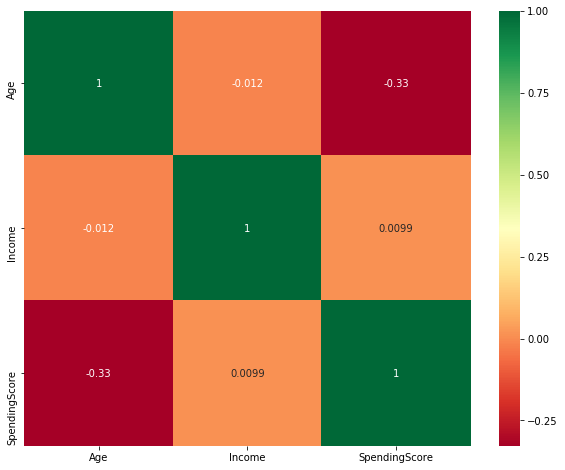

In [4]:
sns.heatmap(df.drop(['CustomerID'],axis=1).corr(),annot=True,cmap='RdYlGn') 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show

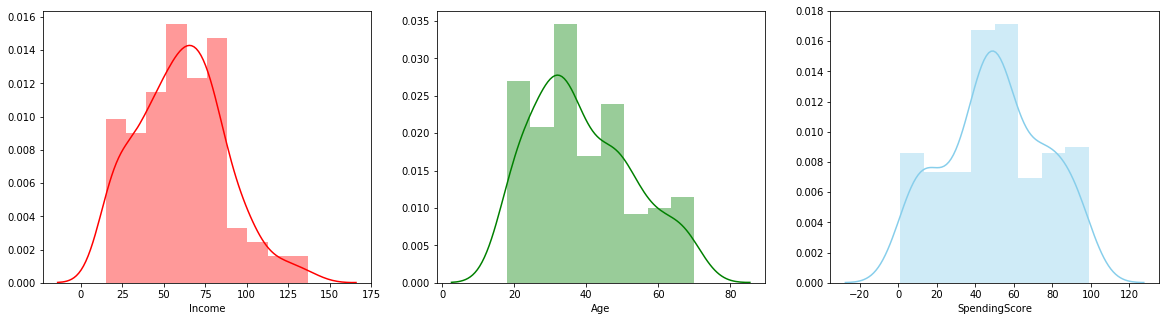

In [8]:
f, axes = plt.subplots(1, 3, figsize=(20, 5)) #sharex=True)
sns.distplot(df['Income'],color="red", label="Income",ax=axes[0])
sns.distplot(df['Age'],color="green", label="Age",ax=axes[1])
sns.distplot(df['SpendingScore'],color="skyblue", label="SpendingScore",ax=axes[2])

A concentration of the data captures customers with Annual Incomes between 25-75k, an age group of beween 20-45 and a spending score of between 40-60, let's split this distribution between Male and Female

In [9]:
from mpl_toolkits.mplot3d import Axes3D

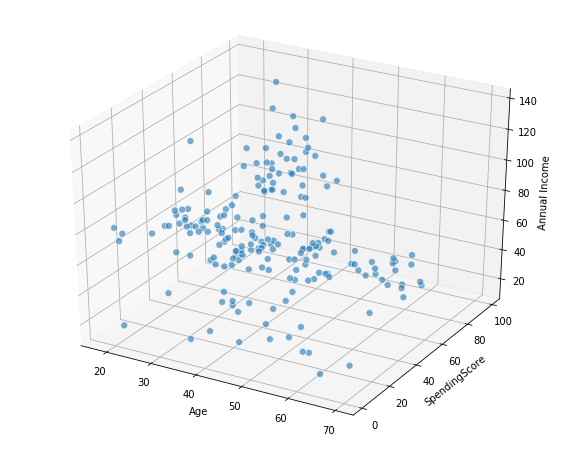

In [12]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df['Age']
ys = df['SpendingScore']
zs = df['Income']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('SpendingScore')
ax.set_zlabel('Annual Income')

plt.show()

# KMeans Clustering¶

In [29]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
X_k = df['Income'].values
y_k = df['SpendingScore'].values

In [14]:
X_k1 = df[['Income' , 'SpendingScore']].iloc[: , :].values

Setting the number of clusters to 5

In [16]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(X_k1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
y_kmeans = model.fit_predict(X_k1)

In [18]:
model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

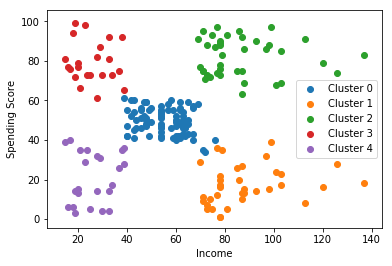

In [19]:
unique_labels = set(model.labels_)
for c in unique_labels:  
    plt.scatter(X_k1[model.labels_ == c, 0],
                X_k1[model.labels_ == c, 1],
                label='Cluster {}'.format(c))
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# (Additional) KNN, Random Forest & Decision Tree Classifier¶


Based on the clustering above in the 3d plot, we have our 5 target groups being classified into the 5 clusters already, we can use that as prediction targets and try to predict the which category a customer will fall under based on the current features using Random Forest & Decision Tree Classifier

Preparing the data

In [25]:
df_target = pd.DataFrame({'target':model.labels_})
df_new = pd.concat([df, df_target], axis=1, sort=False)
df_new = df_new.drop(['CustomerID'], axis=1)
df_new.head(5)

,Genre,Age,Income,SpendingScore,target
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


Spliting the data into training and testing datasets

In [46]:
X_new = df_new.drop(['target'],axis=1)
y_new = df_new['target']

df_gender = pd.get_dummies(X_new['Genre'])
X_new = X_new.drop(['Genre'],axis=1)
X_new = pd.concat([X_new,df_gender],axis=1, sort=False)

X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.25,random_state=42)

Intiating our models, fitting the training data and predicting on the test data


In [47]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [48]:
model_dt = dt.fit(X_train,y_train)
model_rf = rf.fit(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [49]:
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred_dt)

0.94

In [52]:
accuracy_score(y_test,y_pred_rf)

0.96